In [1]:
# 위 작업 일괄 처리 (파일 압축 해제)
%%bash

# 폴더 지우기
rm -rf sample_data/dogs-vs-cats
rm -rf sample_data/dogs-vs-cats2
# 폴더 복사
cp drive/MyDrive/Colab\ Notebooks/data_files/dogs-vs-cats.zip sample_data/
# 폴더 생성
mkdir smaple_data/dogs-vs-cats
# 생성된 폴더에 압축 풀기 1
unzip sample_data/dogs-vs-cats.zip -d sample_data/dogs-vs-cats
# 압축 풀기 2
mkdir sample_data/dogs-vs-cats/train
unzip sample_data/dogs-vs-cats/train.zip -d sample_data/dogs-vs-cats
# train 폴더 안에 사진 들어감
mkdir sample_data/dogs-vs-cats/test1
unzip sample_data/dogs-vs-cats/test1.zip -d sample_data/dogs-vs-cats
# test 폴더 안에 test1 폴더 안에 사진 들어감

# 폴더 이름 변경
mv sample_data/dogs-vs-cats/test1 sample_data/dogs-vs-cats/test

Archive:  sample_data/dogs-vs-cats.zip
  inflating: sample_data/dogs-vs-cats/sampleSubmission.csv  
  inflating: sample_data/dogs-vs-cats/test1.zip  
  inflating: sample_data/dogs-vs-cats/train.zip  
Archive:  sample_data/dogs-vs-cats/train.zip
  inflating: sample_data/dogs-vs-cats/train/cat.0.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.1.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.100.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.1000.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10000.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10001.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10002.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10003.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10004.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10005.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.10006.jpg  
  inflating: sample_data/dogs-vs-cats/train/cat.1

mkdir: cannot create directory ‘smaple_data/dogs-vs-cats’: No such file or directory


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras as tf_keras

In [3]:
# 데이터 디렉터리 구성
# train_dir, test_dir, validation_dir # 훈련, 테스트, 검증 세트 폴더
# train_dir -> cats, dogs             # 범주로 사용될 폴더
# test_dir -> cats, dogs
# validation_dir -> cats, dogs

import os, shutil

src_base = 'sample_data/dogs-vs-cats'
dest_base = 'sample_data/dogs-vs-cats2'

if os.path.exists(dest_base): # 이미 존재하는 폴더라면
  shutil.rmtree(dest_base)    # 폴더 제거 후
os.makedirs(dest_base)        # 새로 폴더 만들기

# 범주를 말할때 앞 숫자는 포함, 뒤 숫자는 불포함
# train 폴더의 0 ~ 1000 : trainset, 1000 ~ 1500 : validationset, 1500 ~ 2000 : testset
# > 0 ~ 999, 1500 ~ 1499, 1500 ~ 1999
# zip을 3개로 걸음. 시작 숫자, 끝 숫자, 들어갈 곳
# > 0 ~ 1000 : train, 1000 ~ 1500 : validation, 1500 ~ 2000 : test 폴더 생성
for start, stop, path in zip([0, 1000, 1500], [1000, 1500, 2000], ['train', 'validation', 'test']):
  os.mkdir(os.path.join(dest_base, path)) # train or validation or test 폴더 생성
  for sub_path in ['cat', 'dog']:
    os.mkdir(os.path.join(dest_base, path, sub_path)) # train, validation, test 하위에 cat or dog 폴더 생성
    for idx in np.arange(start, stop):
      fname = f'{sub_path}.{idx}.jpg'   # ex) cat.1.jpg 를 위치에 맞게 저장
      shutil.copy(os.path.join(src_base, 'train', fname), os.path.join(dest_base, path, sub_path, fname))

In [4]:
# 디렉터리 구성 결과 확인
for path in ['train', 'test', 'validation']:
  for subpath in ['cat', 'dog']:
    print(path, '/', subpath, ':', len(os.listdir(f'sample_data/dogs-vs-cats2/{path}/{subpath}')))

train / cat : 1000
train / dog : 1000
test / cat : 500
test / dog : 500
validation / cat : 500
validation / dog : 500


In [5]:
# 입력 자동화 도구 만들기
# ImageDataGenerator() 이미지를 읽어서 데이터로 만드는 도구

# 특정 디렉터리의 파일을 읽어서 모델의 입력 데이터로 변환하는 도구
train_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
validation_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
test_generator = tf_keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [6]:
# 입력 데이터 구성

datasets = []
for path, generator in zip(['train', 'validation', 'test'],
                           [train_generator, validation_generator, test_generator]):
  dataset = generator.flow_from_directory(directory = f'sample_data/dogs-vs-cats2/{path}',  # 디렉터리에서 알아서 이미지 가져오기
                                          target_size=(256, 256),                           # 이미지 사이즈 일괄 맞춤
                                          batch_size=32,                                    # 한 방에 처리할 이미지 수
                                          class_mode='binary')                              # 범주 몇개냐? binary : 이진분류
  datasets.append(dataset)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [7]:
print(type(datasets[0]))
for x_batch, y_batch in datasets[0]:
  print(x_batch.shape, y_batch.shape)
  print(x_batch[0].max())
  print(y_batch)
  break
# (32, 256, 256, 3) 32: 한 번에 뽑은 이미지 수, 256*256 가로*세로, 3 RGB 3개 채널

<class 'keras.src.legacy.preprocessing.image.DirectoryIterator'>
(32, 256, 256, 3) (32,)
0.64705884
[0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1.]


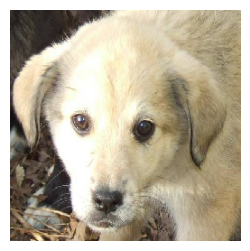

In [8]:
plt.figure(figsize=(3, 3))
plt.imshow(x_batch[3])
plt.axis('off')
plt.show()

# 전이 학습 Transfer Learning

In [9]:
# 이미 만들어진 모델 가져오기 1 (사전 학습 모델 pre-trained model)

base_model = tf_keras.applications.vgg16.VGG16()

base_model.summary()
# 가져다 써도, flatten 부터는 안 씀.
# 이미지를 읽는 능력만 가져오고 판별에 대한 것은 스스로

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 25s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 이미 만들어진 모델 가져오기 2 (최상위 판별층 제외)
# 판별층 제외하는 이유는 우리가 학습할 거고, 얘는 이미지 인식만해라.

base_model = tf_keras.applications.vgg16.VGG16(include_top=False,         # 젤 위에 있는 층은 빼라. = 판별 층은 빼라 (flatten 이하는 빼라)
                                               weights = 'imagenet',      # imagenet 기반의 학습, 웨이트를 가져와라
                                               input_shape=(256, 256, 3)) # 우리 이미지 사이즈와 채널
base_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

<class 'numpy.ndarray'> (256, 256, 3)
(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
(1, 8, 8, 512)


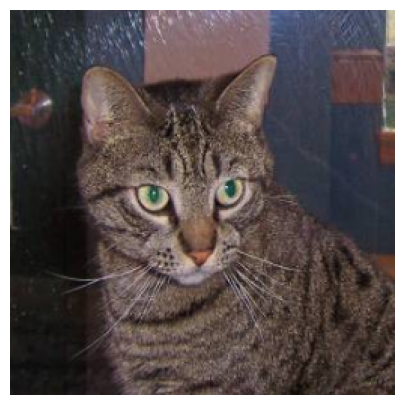

In [11]:
import cv2

cat_img = cv2.imread('sample_data/dogs-vs-cats/train/cat.1.jpg', cv2.IMREAD_COLOR)  # BGR
cat_img = cv2.cvtColor(cat_img, cv2.COLOR_BGR2RGB)  # BGR -> RGB
cat_img = cv2.resize(cat_img, (256, 256))

print( type(cat_img), cat_img.shape )

input = cat_img.reshape(-1, 256, 256, 3) / 255.0  # (배치 크기, 이미지 데이터-shape)
print(input.shape)

predicted_value = base_model.predict(input)   # 사전학습모델을 통해 만든 특성맵 도출
print(predicted_value.shape)

plt.figure(figsize=(5, 5))
plt.imshow(cat_img)
plt.axis('off')
plt.show()

# 입력 데이터 -> 사전 학습 모델 -> 특성 맵

In [17]:
# 입력 데이터 -> 사전 학습 모델 -> 특성 맵 : 이 특성맵을 신규개발모델의 입력으로 사용
# 이 작업 하는 애를 함수로 만들 것

def get_feature_map_by_vgg16_base_model(dataset, cnt):
    all_features = []
    all_labels = []
    for idx, (x_batch, y_batch) in enumerate(dataset):
        features = base_model.predict(x_batch)

        all_features.append(features)
        all_labels.append(y_batch)

        if cnt <= idx:
          break

    return np.concatenate(all_features), np.concatenate(all_labels)

In [18]:
# 나는 train, validation, test 순서라서 train 0, val 1, test 2임
# 만약 train, test, validation 순서라면 train 0, test 1, val 2임

# 우리 batch=32이기 때문에 train: 100*32 = 3200, vla: 50*32 = 1600, test: 50*32 = 1600
train_features, train_labels = get_feature_map_by_vgg16_base_model(datasets[0], 100)
validation_features, validation_labels = get_feature_map_by_vgg16_base_model(datasets[1], 50)
test_features, test_labels = get_feature_map_by_vgg16_base_model(datasets[2], 50)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [20]:
train_features.shape, validation_features.shape, test_features.shape

((3216, 8, 8, 512), (1608, 8, 8, 512), (1608, 8, 8, 512))

# 사전 학습 모델을 통해 만든 특성맵 데이터를 입력으로 사용하는 판별 모델 구조 설계

In [24]:
# 모델 구조 설계 (사전 학습 모델을 통해 만든 특성맵 데이터를 입력으로 사용하는 판별 모델)

# discriminative_model = tf_keras.models.Sequential([
#     tf_keras.lyaers.input(shape=train_features.shape[1:]),  # input_shape=train_features.shape[1:] == (8, 8, 512)
#     tf_keras.layers.Flatten(),
#     tf_keras.layers.Dense(256, activation='relu'),
#     tf_keras.layers.Dense(1, activation='sigmoid')
# ])

# 위와 아래는 동일한 모델로, 아래는 모델을 함수처럼 제작하는 형식이다. (대부분의 모델 개발자들이 아래 방법을 선호한다.)
input = tf_keras.layers.Input(shape=train_features.shape[1:])
x = tf_keras.layers.Flatten()(input)    # 객체() > 객체(input)
x = tf_keras.layers.Dense(256, activation='relu')(x)
output = tf_keras.layers.Dense(1, activation='sigmoid')(x)
discriminative_model = tf_keras.models.Model(inputs=input, outputs=output)

discriminative_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,389,121 (32.00 MB)

 Trainable params: 8,389,121 (32.00 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
# 모델 학습 설계 (사전 학습 모델을 통해 만든 특성맵 데이터를 입력으로 사용하는 판별 모델)
discriminative_model.compile(loss='binary_crossentropy',
                              optimizer='adam',
                              metrics=['accuracy'])

In [27]:
# 판별 모델 학습
fit_history = discriminative_model.fit(train_features, train_labels,
                                      epochs=20,
                                      validation_data=(validation_features, validation_labels))

Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.6713 - loss: 2.1844 - val_accuracy: 0.8812 - val_loss: 0.2728
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9586 - loss: 0.1219 - val_accuracy: 0.8439 - val_loss: 0.3839
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9764 - loss: 0.0650 - val_accuracy: 0.9210 - val_loss: 0.1868
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9985 - loss: 0.0233 - val_accuracy: 0.9210 - val_loss: 0.1925
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9995 - loss: 0.0129 - val_accuracy: 0.9235 - val_loss: 0.1889
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.9204 - val_loss: 0.1902
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0056 - val_accuracy: 0.9266 - val_loss: 0.1978
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0039 - val_accuracy: 0

In [29]:
print(discriminative_model.evaluate(train_features, train_labels))  # 1.0
print(discriminative_model.evaluate(test_features, test_labels))    # 0.913557231426239

101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 3.4465e-04
[0.0003219737554900348, 1.0]
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9093 - loss: 0.2831
[0.27146586775779724, 0.913557231426239]


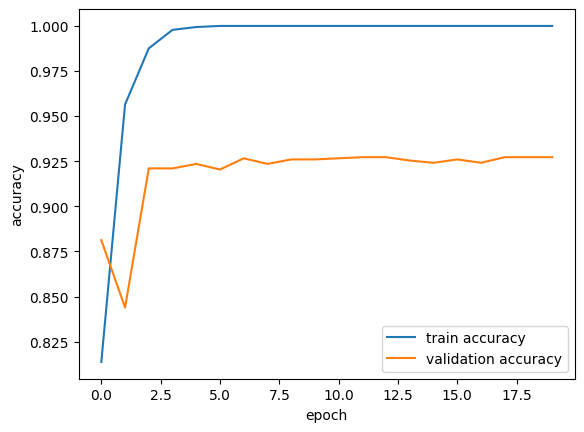

In [32]:
plt.plot(fit_history.epoch, fit_history.history['accuracy'], label= 'train accuracy')
plt.plot(fit_history.epoch, fit_history.history['val_accuracy'], label = 'validation accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()